# Exploratory Data Analysis Starter

## Import packages

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline
pd.set_option('display.max_columns', None)
# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [60]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [61]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [62]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [63]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [64]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [65]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [66]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [67]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

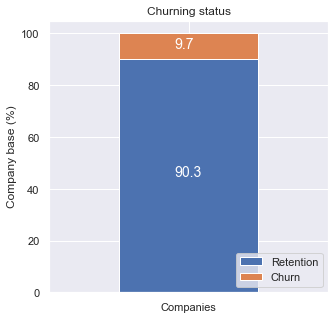

In [68]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

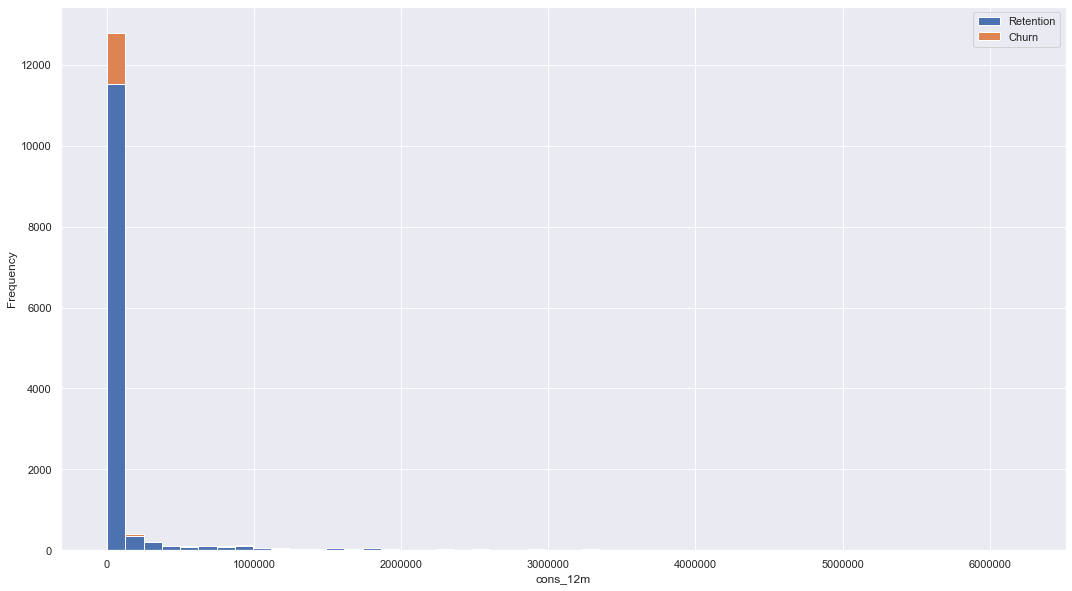

In [69]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 10))

plot_distribution(consumption, 'cons_12m', axs)

In [70]:
# from autoviz.AutoViz_Class import AutoViz_Class
# autoviz = AutoViz_Class().AutoViz('client_data.csv')

In [71]:
# from autoviz.AutoViz_Class import AutoViz_Class
# autoviz = AutoViz_Class().AutoViz('D:\internship\BCG\price_data.csv')

In [72]:
data = pd.merge(client_df,price_df,on='id',how='inner')
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [120]:
data.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [135]:
data[['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix','churn']].corr().loc['churn']

price_off_peak_var   -0.006075
price_peak_var        0.029314
price_mid_peak_var    0.046120
price_off_peak_fix    0.016643
price_peak_fix        0.046852
price_mid_peak_fix    0.044446
churn                 1.000000
Name: churn, dtype: float64

We can say that the Output variable is not correlated with the price variables 

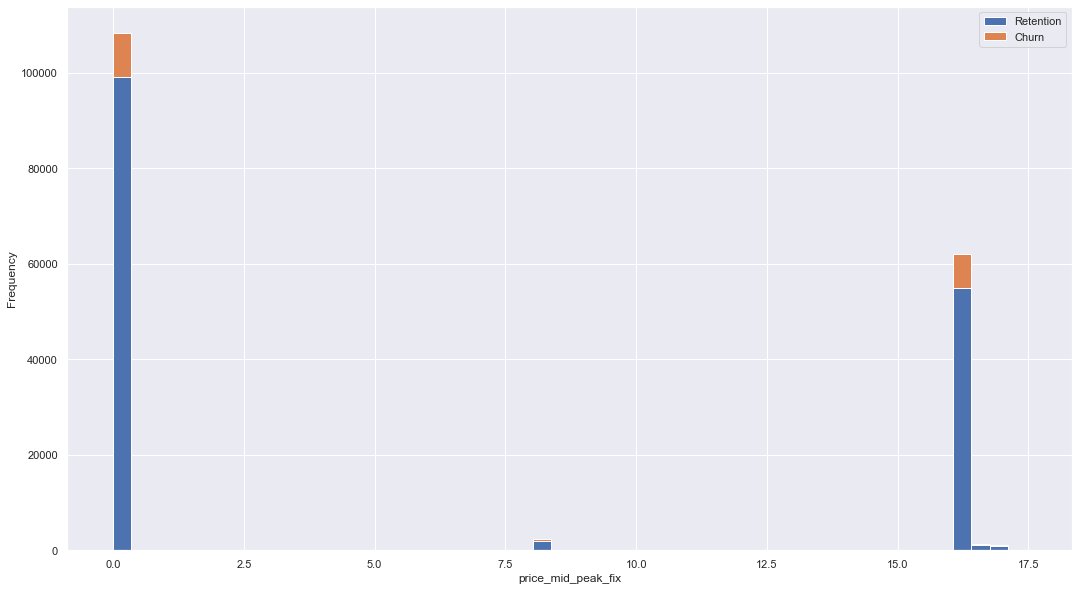

In [74]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(data,'price_mid_peak_fix',ax=axs)

In [75]:
for f in ['date_activ','date_end','date_modif_prod','date_renewal']:
    client_df[f] = pd.to_datetime(client_df[f])

In [76]:
client_df['start_year'] = client_df['date_activ'].dt.year
client_df['end_year'] = client_df['date_end'].dt.year

In [77]:
# define a function to display missing values and dupliate rows
def duplicate_and_missing(dataset, dataset_name):  
    print('There are', dataset.shape[0], 'rows and', dataset.shape[1], 'columns in the dataset', '"'+dataset_name+'"','\n'+'--'*40)
    # display missing values
    if dataset.isna().sum().sum()!=0:  # if there is missing values
        missing_value = dataset.isna().sum()[dataset.isna().sum()!=0].to_frame(name='count')
        missing_value['proportion'] = missing_value['count']/len(dataset)
        print('There are', dataset.isna().sum().sum(), 'missing values')
        print(missing_value, '\n'+'--'*40)
    else:
        print('There is no missing value')
    # display duplicate rows
    if dataset.duplicated().sum()!=0:
        print('There are', dataset.duplicated().sum(), 'duplicate rows\n')
    else:
        print('There is no duplicate row\n')

In [78]:
duplicate_and_missing(client_df,'client')

There are 14606 rows and 28 columns in the dataset "client" 
--------------------------------------------------------------------------------
There is no missing value
There is no duplicate row



In [79]:
def describe_categorical(dataset):
    cat_columns = dataset.dtypes[dataset.dtypes == object].index.tolist()
    if len(cat_columns) != 0:
        print('Categorical_columns are',cat_columns,'\n'+'--'*40)
        for cat in cat_columns:
            describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
            describe_frame['proportion'] = describe_frame['count']/len(dataset)
            print(describe_frame)
    else:
        print('There are no Categorical Columns')

In [80]:
describe_categorical(client_df)

Categorical_columns are ['id', 'channel_sales', 'has_gas', 'origin_up'] 
--------------------------------------------------------------------------------
                                     id  count  proportion
0      0002203ffbb812588b632b9e628cc38d      1    0.000068
1      ab250252dfaded1c9a54834f9c829b43      1    0.000068
2      ab32c3a8d93c88b485499566526cb34d      1    0.000068
3      ab3392ec2bfd3605624f31d3c6828c21      1    0.000068
4      ab346731fef5aa291919ea43e45af5a7      1    0.000068
...                                 ...    ...         ...
14601  55091aace7bd0fadd194f46cb4886fea      1    0.000068
14602  550b8d2f9c298abd8f05fca3bc1a13c4      1    0.000068
14603  5514b18508f378a39f41657554aa72e3      1    0.000068
14604  551cb1b1faf72259c2c182dedec12c98      1    0.000068
14605  ffff7fa066f1fb305ae285bb03bf325a      1    0.000068

[14606 rows x 3 columns]
                      channel_sales  count  proportion
0  foosdfpfkusacimwkcsosbicdxkicaua   6754    0.462413
1 

In [81]:
from sklearn.calibration import LabelEncoder
encoder = LabelEncoder()
client_df['channel_sales'] = encoder.fit_transform(client_df['channel_sales']) 
client_df['origin_up'] = encoder.fit_transform(client_df['origin_up'])

In [82]:
client_df[client_df.dtypes[client_df.dtypes == 'datetime64[ns]'].index.tolist()].describe(datetime_is_numeric=True)

,date_activ,date_end,date_modif_prod,date_renewal
count,14606,14606,14606,14606
mean,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488
min,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00
25%,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00
50%,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00
75%,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00
max,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00


# Checking the Price data frame 

In [83]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [84]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'])

In [85]:
price_df[['price_date']].describe(datetime_is_numeric=True)

,price_date
count,193002
mean,2015-06-16 12:50:49.933161216
min,2015-01-01 00:00:00
25%,2015-04-01 00:00:00
50%,2015-07-01 00:00:00
75%,2015-10-01 00:00:00
max,2015-12-01 00:00:00


# define a function to plot bar chart to display a feature's distribution with percent labels.

In [86]:
def plot_bar_chart_with_percent_label(df, target_variable, if_sort=False, gap_label_bar=0, figsize=(9,6)):
    # prepare data
    plot_data = df[[target_variable]].value_counts().reset_index(name='count')
    plot_data['percent'] = plot_data['count']/plot_data['count'].sum()
    if if_sort:
        x_order = plot_data.sort_values(by=['percent'], ascending=False)[target_variable]
    else:
        x_order = plot_data.sort_values(by=[target_variable], ascending=True)[target_variable]
    # plot
    fig = plt.figure(figsize=figsize)
    ax = sns.barplot(data=plot_data, x=target_variable, y='percent', order=x_order)
    # add label
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height() + gap_label_bar
        ax.annotate(text='{:.2f}%'.format(p.get_height()*100), xy=(x, y), ha='center')
    ax.margins(y=0.1)

# plot stacked bar chart with percent label by churn
def plot_stacked_bar_with_percent_label_by_churn(df, target_variable,output_variable , if_sort=False, figsize=(9,6)):
    plot_data = df.groupby([target_variable,output_variable]).size().reset_index(name='count')
    plot_data = plot_data.pivot(index=target_variable, columns= output_variable, values='count').fillna(0)
    plot_data = plot_data.div(plot_data.sum(axis=1), axis=0)
    if if_sort:
        plot_data = plot_data.sort_values(by=[0])
    ax = plot_data.plot(kind='bar', rot=False, stacked=True, figsize=figsize)
    plt.legend(['stay', 'switch'], loc='upper center', ncol=2)
    # add label
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height()*100)
        if percentage!='0.0%':
            x = p.get_x() + p.get_width()/2
            y = 1 - p.get_height()/1.8
            ax.annotate(text=percentage, xy=(x, y), ha='center')
    ax.margins(y=0.1)

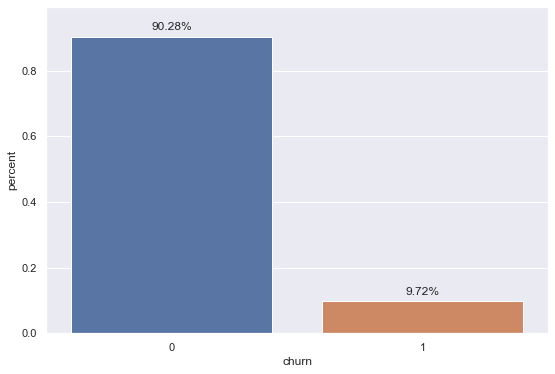

In [87]:
plot_bar_chart_with_percent_label(df = client_df,target_variable = 'churn',gap_label_bar= 0.02)

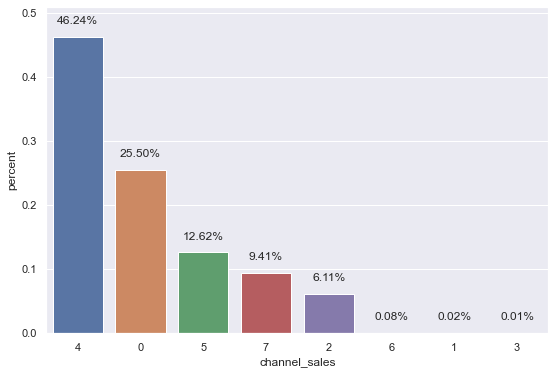

In [88]:
plot_bar_chart_with_percent_label(df=client_df,target_variable='channel_sales',if_sort=True,gap_label_bar=0.02)

Here we can see that maximum no. of people select channel 4 and 0 and very least no. of people select channel 1,3,6.

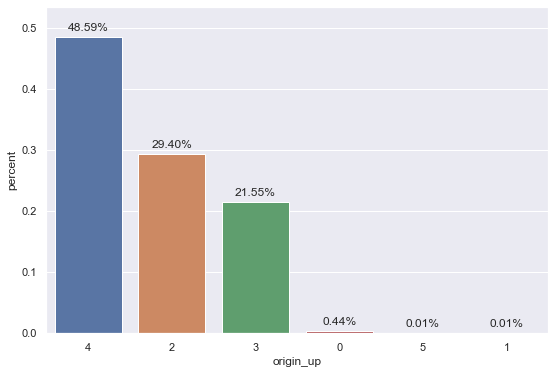

In [89]:
plot_bar_chart_with_percent_label(df=client_df,target_variable='origin_up',if_sort=True,gap_label_bar=0.01)

Type 4 is the most prefered electricyty campaing and type 0,5,1 are the least favoured electricity campaigns. 

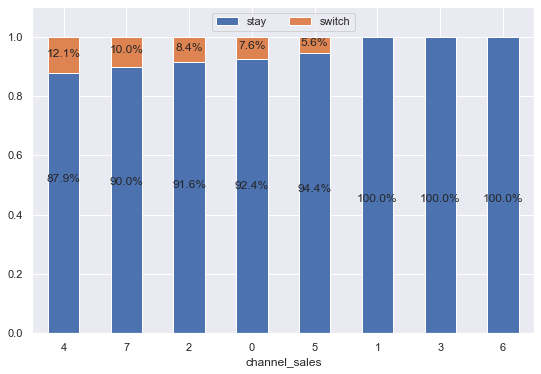

In [90]:
plot_stacked_bar_with_percent_label_by_churn(df=client_df,target_variable='channel_sales',output_variable='churn',if_sort=True)

We can see that the churn rate ranges between 5%-12% and there is no churn in channel sales of 1,3 & 6.

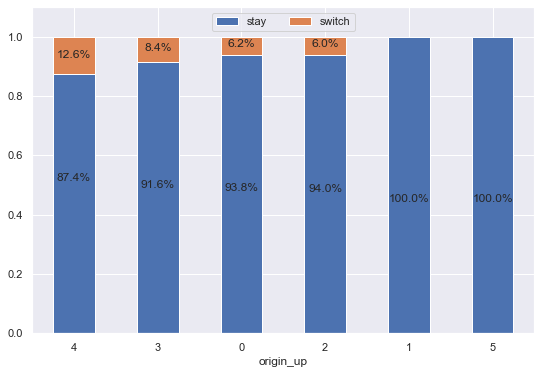

In [91]:
plot_stacked_bar_with_percent_label_by_churn(df=client_df,target_variable='origin_up',output_variable='churn',if_sort=True)

The churn rate of customers in electricity campaing ranges from 6%-13% excluding campaing 1 & 5.

In [92]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'start_year', 'end_year'],
      dtype='object')

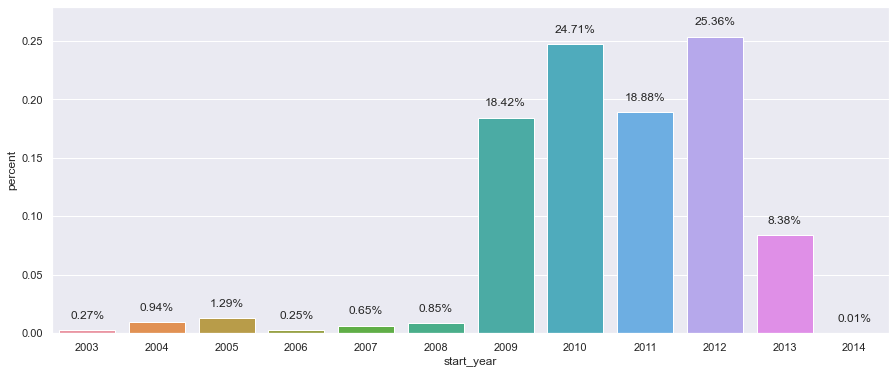

In [93]:
plot_bar_chart_with_percent_label(df=client_df,target_variable='start_year',gap_label_bar=0.01,figsize=(15,6))

We can say that most of the new customers subscribed in the year 2009-2013.

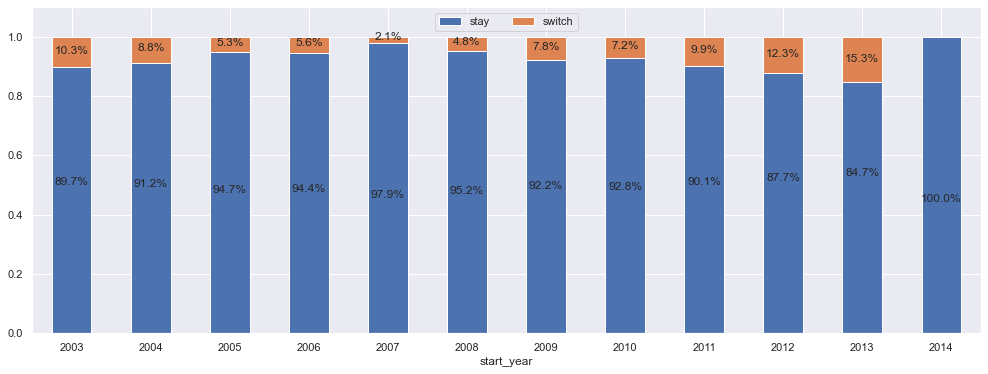

In [94]:
plot_stacked_bar_with_percent_label_by_churn(df=client_df,target_variable='start_year',output_variable='churn',figsize=(17,6))

We can see that the churn rate decreases from year 2003 to 2007 and from 2005  till 2008 it is less than 6% which indicates that maximum no. of companies stays to the same provider. But from the year 2009-20013 we can see that the churn rate increases and also many new customers also subsuccribes durin this period. So we can say that newer customers tend to churn more as compared to old customers.

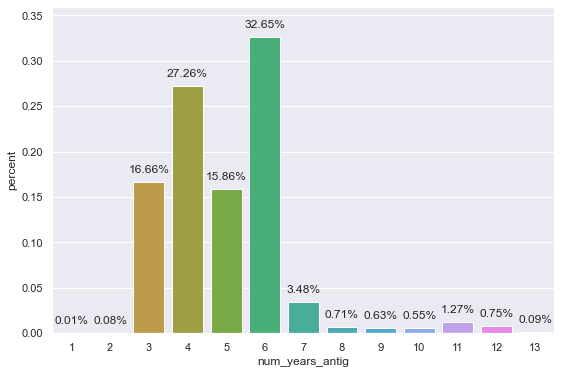

In [95]:
plot_bar_chart_with_percent_label(client_df,target_variable='num_years_antig',gap_label_bar=0.01)

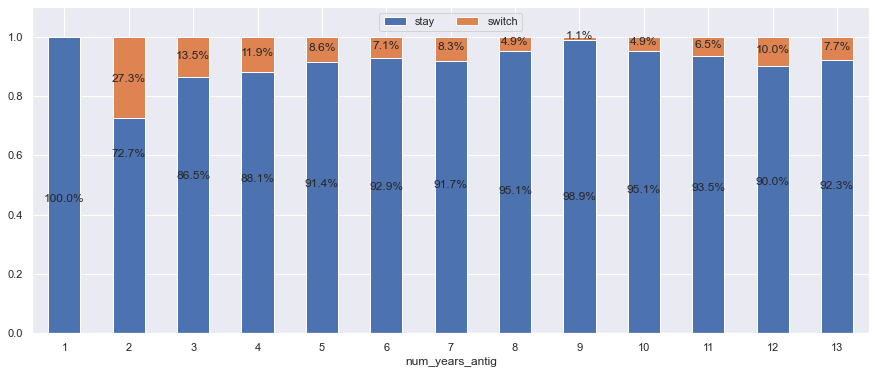

In [96]:
plot_stacked_bar_with_percent_label_by_churn(df=client_df,target_variable='num_years_antig',output_variable='churn',figsize=(15,6))

Most of the customers stays to their current provider for 3-6 years. And newer customers tend to churn alot compared to other customers.

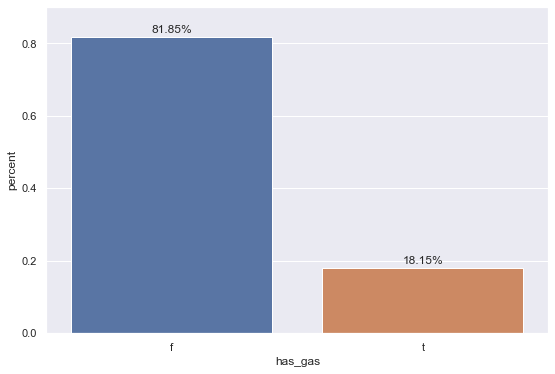

In [97]:
plot_bar_chart_with_percent_label(df=client_df,target_variable='has_gas',gap_label_bar=0.01)

81.85% of Customers have gas service also

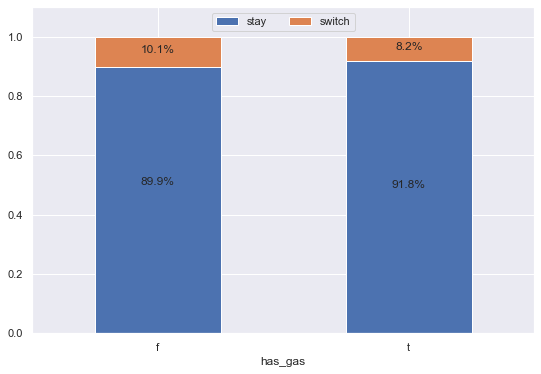

In [98]:
plot_stacked_bar_with_percent_label_by_churn(df=client_df,target_variable='has_gas',output_variable='churn')

The people having only subscription of electricyty tends to swtich more than people having subsciprtion of both electricity and gas. 

In [99]:
price_df.id.value_counts().value_counts()

12    15990
11       83
10       11
9         6
8         3
7         3
Name: id, dtype: int64

In [100]:
import statsmodels.api as sm

# Fit a logistic regression model
log_reg = sm.Logit(data.churn, data[['price_off_peak_var', 'price_peak_var',
'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
'price_mid_peak_fix']]).fit()

# Perform Wald test on each variable
wald_tests = log_reg.wald_test_terms()

# Extract p-values from the Wald test results
p_values = wald_tests.pvalues

# Iterate over each variable and its corresponding p-value
for i, col in enumerate(data[['price_off_peak_var', 'price_peak_var',
'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
'price_mid_peak_fix']]):
    p_value = p_values[i]
    if p_value < 0.05:  # significance level
        print(f"{col} is significant (p-value = {p_value:.4f})")
    else:
        print(f"{col} is not significant (p-value = {p_value:.4f})")


Optimization terminated successfully.
         Current function value: 0.321889
         Iterations 7
price_off_peak_var is significant (p-value = 0.0000)
price_peak_var is significant (p-value = 0.0000)
price_mid_peak_var is not significant (p-value = 0.3513)
price_off_peak_fix is significant (p-value = 0.0000)
price_peak_fix is significant (p-value = 0.0000)
price_mid_peak_fix is significant (p-value = 0.0000)


c:\Users\riddh\anaconda3\lib\site-packages\statsmodels\base\model.py:1889: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


In [101]:
# from pandas_profiling import ProfileReport
# report = ProfileReport(client_df,explorative=True)
# report.to_file('output.html')

In [102]:
# report2 = ProfileReport(data,explorative=True)
# report2.to_file('output2.htnl')

In [103]:
price_df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [104]:
stat = ['max','min','mean']
price_attr = ['price_off_peak_var', 'price_peak_var','price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix','price_mid_peak_fix']
price_stat = price_df.drop(columns=['price_date']).groupby(by=['id']).agg({'price_off_peak_var':stat,'price_peak_var':stat,'price_mid_peak_var': stat, 'price_off_peak_fix': stat, 'price_peak_fix': stat,'price_mid_peak_fix': stat})
price_stat.head()


price_off_peak_var                      \
                                                max       min      mean   
id                                                                        
0002203ffbb812588b632b9e628cc38d           0.128067  0.119906  0.124338   
0004351ebdd665e6ee664792efc4fd13           0.148405  0.143943  0.146426   
0010bcc39e42b3c2131ed2ce55246e3c           0.205742  0.150837  0.181558   
0010ee3855fdea87602a5b7aba8e42de           0.123086  0.113068  0.118757   
00114d74e963e47177db89bc70108537           0.149902  0.145440  0.147926   

                                 price_peak_var                      \
                                            max       min      mean   
id                                                                    
0002203ffbb812588b632b9e628cc38d       0.105842  0.101673  0.103794   
0004351ebdd665e6ee664792efc4fd13       0.000000  0.000000  0.000000   
0010bcc39e42b3c2131ed2ce55246e3c       0.000000  0.000000  0.000000   
0010ee3855fdea87602a5b7aba8e42de       0.100505  0.095385  0.098292   
00114d74e963e47177db89bc70108537       0.000000  0.000000  0.000000   

                                 price_mid_peak_var                      \
                                                max       min      mean   
id                                                                        
0002203ffbb812588b632b9e628cc38d           0.073773  0.070232  0.073160   
0004351ebdd665e6ee664792efc4fd13           0.000000  0.000000  0.000000   
0010bcc39e42b3c2131ed2ce55246e3c           0.000000  0.000000  0.000000   
0010ee3855fdea87602a5b7aba8e42de           0.069463  0.068646  0.069032   
00114d74e963e47177db89bc70108537           0.000000  0.000000  0.000000   

                                 price_off_peak_fix                        \
                                                max        min       mean   
id                                                                          
0002203ffbb812588b632b9e628cc38d          40.728885  40.565969  40.701732   
0004351ebdd665e6ee664792efc4fd13          44.444710  44.266931  44.385450   
0010bcc39e42b3c2131ed2ce55246e3c          45.944710  44.444710  45.319710   
0010ee3855fdea87602a5b7aba8e42de          40.728885  40.565969  40.647427   
00114d74e963e47177db89bc70108537          44.266931  44.266930  44.266930   

                                 price_peak_fix                        \
                                            max        min       mean   
id                                                                      
0002203ffbb812588b632b9e628cc38d       24.43733  24.339581  24.421038   
0004351ebdd665e6ee664792efc4fd13        0.00000   0.000000   0.000000   
0010bcc39e42b3c2131ed2ce55246e3c        0.00000   0.000000   0.000000   
0010ee3855fdea87602a5b7aba8e42de       24.43733  24.339578  24.388455   
00114d74e963e47177db89bc70108537        0.00000   0.000000   0.000000   

                                 price_mid_peak_fix                        
                                                max        min       mean  
id                                                                         
0002203ffbb812588b632b9e628cc38d          16.291555  16.226389  16.280694  
0004351ebdd665e6ee664792efc4fd13           0.000000   0.000000   0.000000  
0010bcc39e42b3c2131ed2ce55246e3c           0.000000   0.000000   0.000000  
0010ee3855fdea87602a5b7aba8e42de          16.291555  16.226383  16.258971  
00114d74e963e47177db89bc70108537           0.000000   0.000000   0.000000

In [105]:
price_stat.columns = ['_'.join(x) for x in zip(price_stat.columns.get_level_values(0),price_stat.columns.get_level_values(1))]
price_stat = price_stat.reset_index()
price_stat.head()

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.073160,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.123086,0.113068,0.118757,0.100505,0.095385,0.098292,0.069463,0.068646,0.069032,40.728885,40.565969,40.647427,24.43733,24.339578,24.388455,16.291555,16.226383,16.258971
4,00114d74e963e47177db89bc70108537,0.149902,0.145440,0.147926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.266931,44.266930,44.266930,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [106]:
price_stat = price_stat.merge(client_df[['id','churn']],on=['id'],how='inner')
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,0
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [107]:
for attr in price_attr:
    price_stat[f'diff_max_min_{attr}'] = price_stat[f'{attr}_max'] - price_stat[f'{attr}_min']
#
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn,diff_max_min_price_off_peak_var,diff_max_min_price_peak_var,diff_max_min_price_mid_peak_var,diff_max_min_price_off_peak_fix,diff_max_min_price_peak_fix,diff_max_min_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,0,0.008161,0.004169,0.003541,0.162916,0.097749,0.065166
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.004462,0.000000,0.000000,0.177779,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.054905,0.000000,0.000000,1.500000,0.000000,0.000000


In [108]:
def plot_histogram_by_churn(df, target_variable, figsize=(20,5), bins=100, if_churn=True):
    fig = plt.figure(figsize=figsize)
    if if_churn:
        ax = sns.histplot(data=df, x=target_variable, bins=bins, hue='churn')
    else:
        ax = sns.histplot(data=df, x=target_variable, bins=bins)

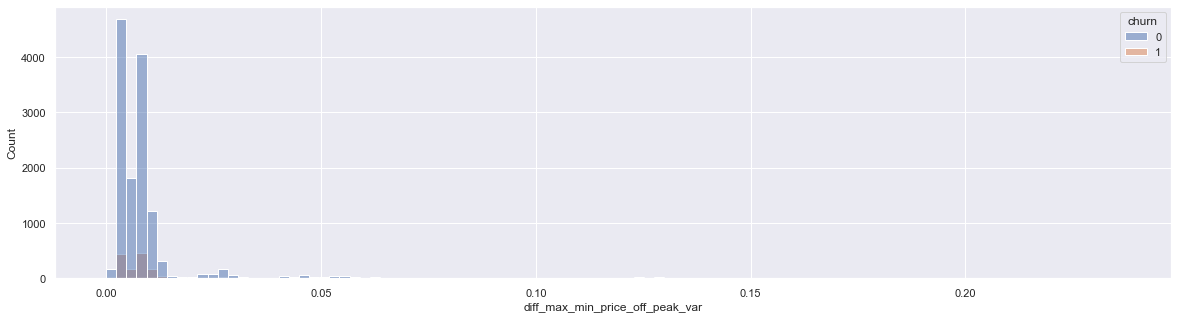

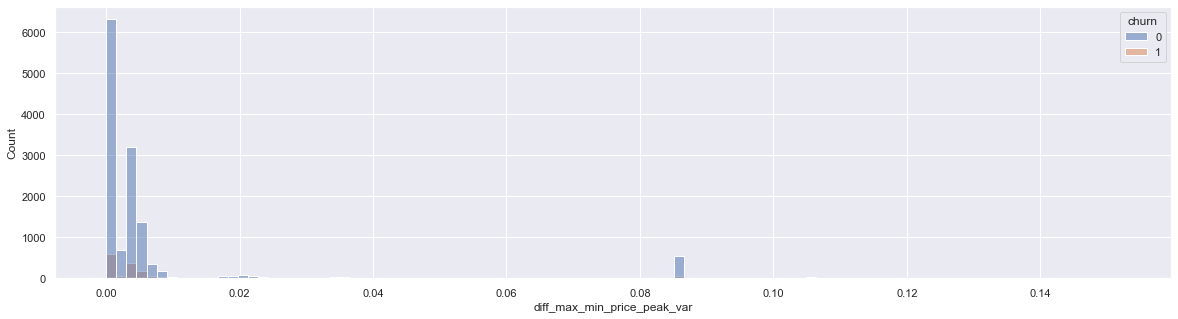

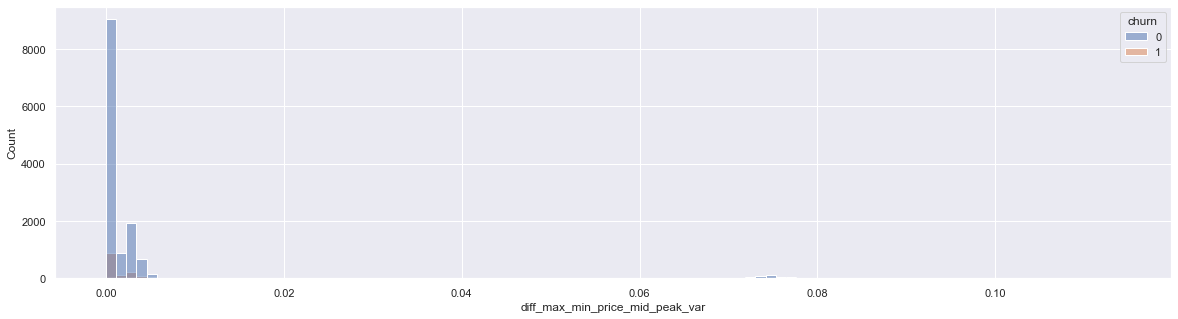

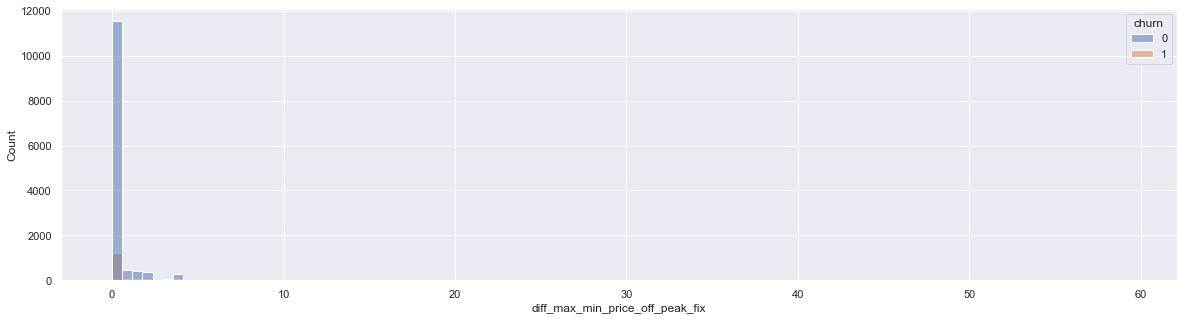

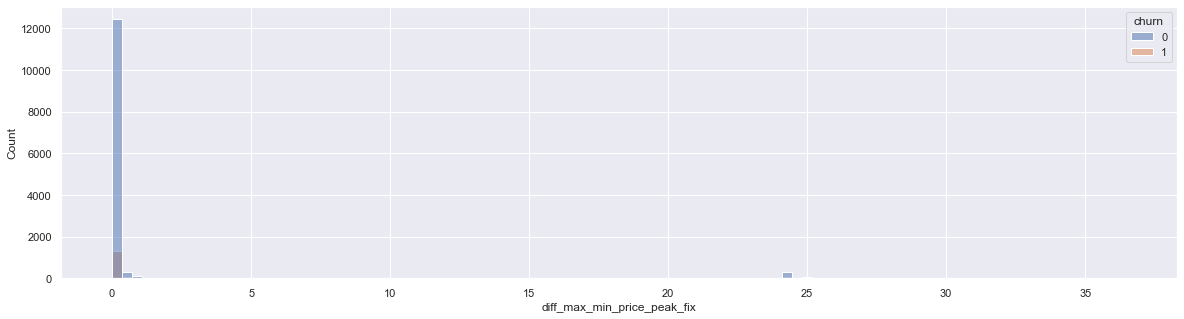

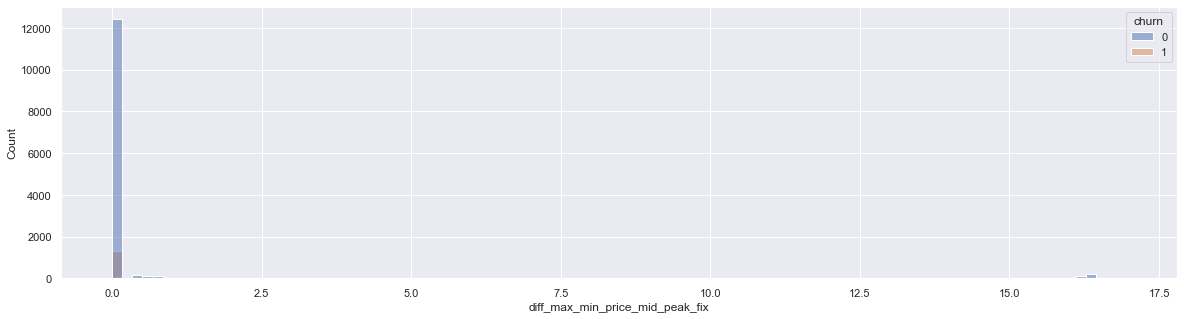

In [109]:
for attr in price_attr:
    plot_histogram_by_churn(df=price_stat, target_variable=f'diff_max_min_{attr}', if_churn=True)

In [110]:
for attr in price_attr:
    price_stat[f'diff_Dec_mean_{attr}'] = price_df[price_df['id'].isin(price_stat['id'])].groupby(['id'])[attr].nth(-1).values - price_stat[f'{attr}_mean']
#
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn,diff_max_min_price_off_peak_var,diff_max_min_price_peak_var,diff_max_min_price_mid_peak_var,diff_max_min_price_off_peak_fix,diff_max_min_price_peak_fix,diff_max_min_price_mid_peak_fix,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_peak_var,diff_Dec_mean_price_mid_peak_var,diff_Dec_mean_price_off_peak_fix,diff_Dec_mean_price_peak_fix,diff_Dec_mean_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,0,0.008161,0.004169,0.003541,0.162916,0.097749,0.065166,-0.004432,-0.002121,0.000559,0.027153,0.016292,0.010861
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.004462,0.000000,0.000000,0.177779,0.000000,0.000000,-0.002483,0.000000,0.000000,0.059260,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.054905,0.000000,0.000000,1.500000,0.000000,0.000000,0.019722,0.000000,0.000000,0.625000,0.000000,0.000000


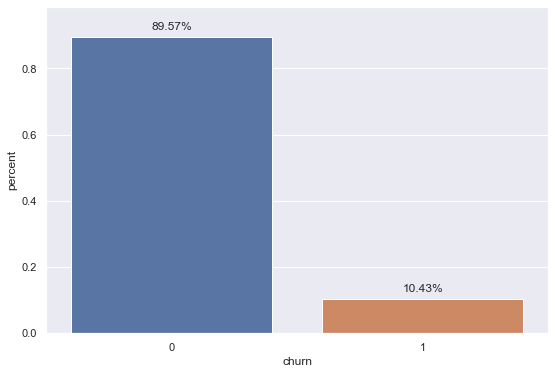

In [111]:
plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)

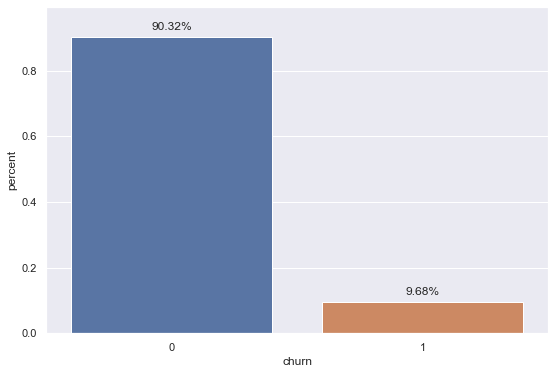

In [112]:
plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_var']<=0], target_variable='churn', gap_label_bar=0.02)

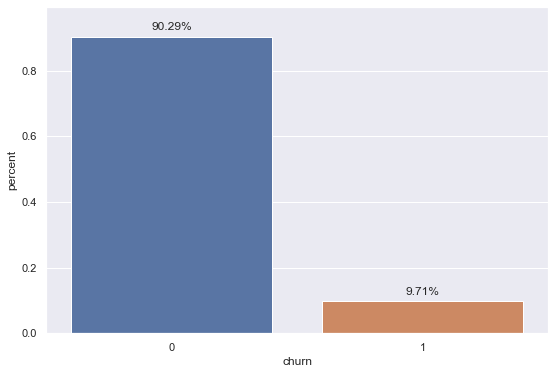

In [113]:
plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

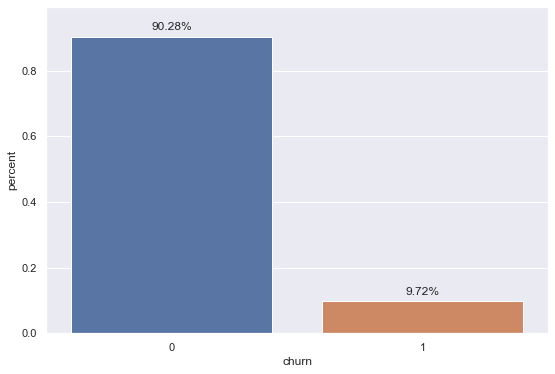

In [114]:
plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_fix']<=0], target_variable='churn', gap_label_bar=0.02)

From the above results, we can see no matter how prices changed, proportion of churning customers always stayed around 9.72% & Only for the case off peak var price it rose 0.71% to 10.43. In other words, changes in prices did not affect customer churn. Therefore, we can conclude customers were not sensitive to prices.

In [153]:
var_year = price_df.groupby(['id', 'price_date']).mean().groupby(['id']).var().reset_index()
var_year.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,1.871602e-06,4.021438e-03,0.001448,0.000643
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000e+00,7.661891e-03,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000e+00,5.965909e-01,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.000025,0.000007,1.627620e-07,7.238536e-03,0.002606,0.001158
4,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000e+00,3.490909e-13,0.000000,0.000000


In [159]:
df = price_df.groupby(['id', 'price_date']).mean().groupby(['id']).var()
df.head(10)

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,1.871602e-06,4.021438e-03,0.001448,0.000643
0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000e+00,7.661891e-03,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000e+00,5.965909e-01,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.000025,0.000007,1.627620e-07,7.238536e-03,0.002606,0.001158
00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000e+00,3.490909e-13,0.000000,0.000000
00126c87cf78d7604278f0a9adeb689e,0.000038,0.000015,1.182619e-06,7.037517e-03,0.002534,0.001126
0013f326a839a2f6ad87a1859952d227,0.000016,0.000004,1.750118e-06,0.000000e+00,0.000000,0.000000
00184e957277eeef733a7b563fdabd06,0.000005,0.000000,0.000000e+00,3.490909e-13,0.000000,0.000000
001987ed9dbdab4efa274a9c7233e1f4,0.000016,0.000003,2.436799e-06,7.238589e-03,0.002606,0.001158
